In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

X = lfw.data
images = lfw.images
h, w = images.shape[1], images.shape[2]

print("Shape of data matrix:", X.shape)

Shape of data matrix: (1560, 1850)


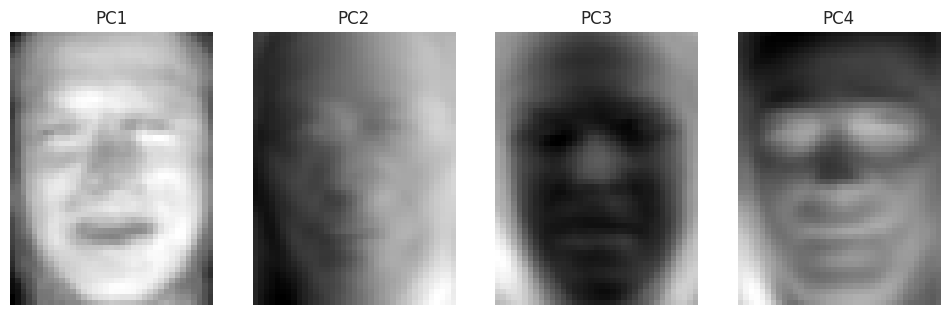

In [3]:
pca = PCA(n_components=150)
pca.fit(X)

eigenfaces = pca.components_.reshape((150, h, w))

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(eigenfaces[i], cmap="gray")
    axes[i].set_title(f"PC{i+1}")
    axes[i].axis("off")
plt.show()

In [ ]:
idx = 0
original = X[idx]

ks = [20, 80, 150]
reconstructions = []

for k in ks:
    pca_k = PCA(n_components=k)
    X_pca = pca_k.fit_transform(X)
    X_rec = pca_k.inverse_transform(X_pca)
    reconstructions.append(X_rec[idx])